In [1]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
import pandas as pd
from neuralprophet import NeuralProphet

In [3]:
from prophet import Prophet
import pandas as pd

In [4]:
from prophet import Prophet
import pandas as pd
s=pd.read_excel(r"C:\Users\prernagupta\Desktop\jeans-bf\wrapskirt1.xlsx")
s

,trend_index,trend_name,trend,base,model_created_at,season,ds,y,nsi,fsi_yhat_lower,fsi_yhat,fsi_yhat_upper,fsi_pivot_points,trending_index,newness_index,markdown_index,fashion_leaders_index,oos_index,catwalk_impact
0,379,wrap_skirt_uk_w,Wrap Skirt Uk,Skirts,2022-03-01,S/S 2017,2017-03-20,0.063334,0.075031,0.050137,0.058239,0.065588,"['2020-09-07', '2021-08-30']",1.212795,-0.059219,1.138102,0.512556,0.069396,0.238461
1,379,wrap_skirt_uk_w,Wrap Skirt Uk,Skirts,2022-03-01,S/S 2017,2017-03-27,0.063368,0.074894,0.051985,0.059792,0.068449,"['2020-09-07', '2021-08-30']",1.182851,-0.032019,1.131226,0.503315,0.067908,0.240827
2,379,wrap_skirt_uk_w,Wrap Skirt Uk,Skirts,2022-03-01,S/S 2017,2017-04-03,0.062214,0.074367,0.053710,0.061319,0.069421,"['2020-09-07', '2021-08-30']",1.153782,-0.004574,1.124594,0.494456,0.067228,0.243193
3,379,wrap_skirt_uk_w,Wrap Skirt Uk,Skirts,2022-03-01,S/S 2017,2017-04-10,0.063398,0.073501,0.054482,0.062596,0.071011,"['2020-09-07', '2021-08-30']",1.125590,0.023116,1.118205,0.485979,0.067256,0.245523
4,379,wrap_skirt_uk_w,Wrap Skirt Uk,Skirts,2022-03-01,S/S 2017,2017-04-17,0.063974,0.072349,0.055229,0.063463,0.071989,"['2020-09-07', '2021-08-30']",1.098273,0.051050,1.112060,0.477884,0.067889,0.247418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,379,wrap_skirt_uk_w,Wrap Skirt Uk,Skirts,2022-03-01,S/S 2024,2024-02-12,NaN,NaN,0.149769,0.157967,0.166102,"['2020-09-07', '2021-08-30']",NaN,NaN,NaN,NaN,NaN,NaN
361,379,wrap_skirt_uk_w,Wrap Skirt Uk,Skirts,2022-03-01,S/S 2024,2024-02-19,NaN,NaN,0.148918,0.157565,0.166154,"['2020-09-07', '2021-08-30']",NaN,NaN,NaN,NaN,NaN,NaN
362,379,wrap_skirt_uk_w,Wrap Skirt Uk,Skirts,2022-03-01,S/S 2024,2024-02-26,NaN,NaN,0.149300,0.157495,0.166001,"['2020-09-07', '2021-08-30']",NaN,NaN,NaN,NaN,NaN,NaN
363,379,wrap_skirt_uk_w,Wrap Skirt Uk,Skirts,2022-03-01,S/S 2024,2024-03-04,NaN,NaN,0.149616,0.157875,0.165573,"['2020-09-07', '2021-08-30']",NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
s=s.iloc[:, [6, 7]]
s
s['ds']= pd.to_datetime(s['ds'])
s

WARNING - (py.warnings._showwarnmsg) - <ipython-input-5-60943957d9c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s['ds']= pd.to_datetime(s['ds'])



,ds,y
0,2017-03-20,0.063334
1,2017-03-27,0.063368
2,2017-04-03,0.062214
3,2017-04-10,0.063398
4,2017-04-17,0.063974
...,...,...
360,2024-02-12,NaN
361,2024-02-19,NaN
362,2024-02-26,NaN
363,2024-03-04,NaN


In [6]:
s=s.dropna()

In [7]:
m = NeuralProphet(growth="discontinuous",  # Determine trend types: 'linear', 'discontinuous', 'off'
        changepoints=None, # list of dates that may include change points (None -> automatic )
        n_changepoints=5,
        changepoints_range=1,
        trend_reg=0,
        trend_reg_threshold=False,
        yearly_seasonality=True,
        weekly_seasonality=False,
        daily_seasonality=False,
        seasonality_mode="additive",
        seasonality_reg=0,
        n_forecasts=1,
        n_lags=0,
        num_hidden_layers=0,
        d_hidden=None,     # Dimension of hidden layers of AR-Net
        ar_sparsity=None,  # Sparcity in the AR coefficients
        learning_rate=5,
        loss_func="Huber",
        normalize="auto",  # Type of normalization ('minmax', 'standardize', 'soft', 'off')
        impute_missing=True, epochs=5000)
metrics = m.fit(s, freq="7D")
future = m.make_future_dataframe(s, periods=75, n_historic_predictions=len(s))
forecast = m.predict(future)

INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
Epoch[5000/5000]: 100%|█| 5000/5000 [02:10<00:00, 38.39it/s, SmoothL1Loss=0.0014, MAE=0.00304, RMSE=0.00418, RegLoss=0]


In [8]:
metrics

,SmoothL1Loss,MAE,RMSE,RegLoss
0,0.125368,0.031062,0.039073,0.0
1,0.046561,0.020514,0.024613,0.0
2,0.018816,0.012753,0.016054,0.0
3,0.010258,0.009574,0.011741,0.0
4,0.008931,0.008824,0.010994,0.0
...,...,...,...,...
4995,0.001398,0.003040,0.004176,0.0
4996,0.001398,0.003040,0.004227,0.0
4997,0.001398,0.003041,0.004169,0.0
4998,0.001398,0.003041,0.004193,0.0


Text(0.5, 1.0, 'warp-skirt')

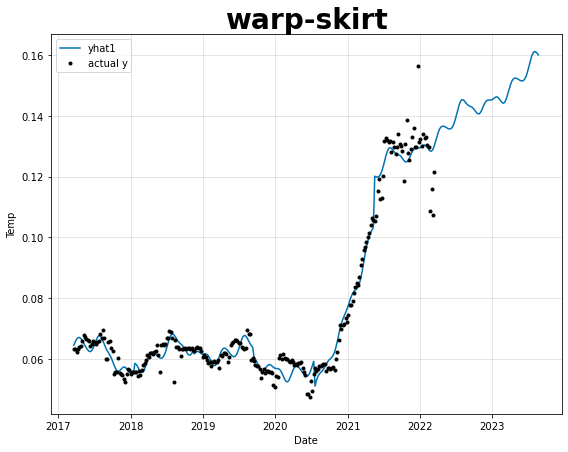

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))
m.plot(forecast, xlabel="Date", ylabel="Temp", ax=ax)
ax.set_title("warp-skirt", fontsize=28, fontweight="bold")

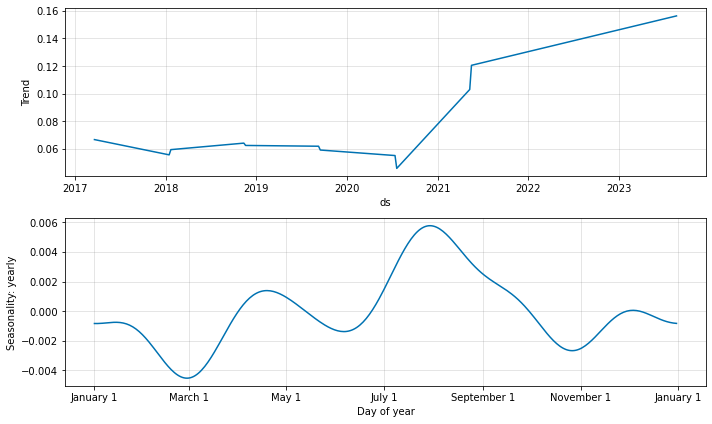

In [10]:
fig_comp = m.plot_components(forecast)

In [11]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [16]:
import numpy as np
forecast

,ds,y,yhat1,residual1,trend,season_yearly
0,2017-03-20,0.063334,0.064570,0.001236,0.066769,-0.002199
1,2017-03-27,0.063368,0.065652,0.002284,0.066513,-0.000860
2,2017-04-03,0.062214,0.066548,0.004334,0.066256,0.000292
3,2017-04-10,0.063398,0.067058,0.003660,0.065999,0.001059
4,2017-04-17,0.063974,0.067119,0.003146,0.065742,0.001377
...,...,...,...,...,...,...
331,2023-07-24,NaN,0.160515,NaN,0.155005,0.005510
332,2023-07-31,NaN,0.161075,NaN,0.155308,0.005768
333,2023-08-07,NaN,0.161041,NaN,0.155610,0.005431
334,2023-08-14,NaN,0.160593,NaN,0.155913,0.004680


In [19]:
MAPE(forecast1['y'], forecast1['yhat1'])

4.193393328208131